Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# PLOTS

Please add the file "customer_churn_dataset.csv"

In [ ]:
df = pd.read_csv("customer_churn_dataset.csv")

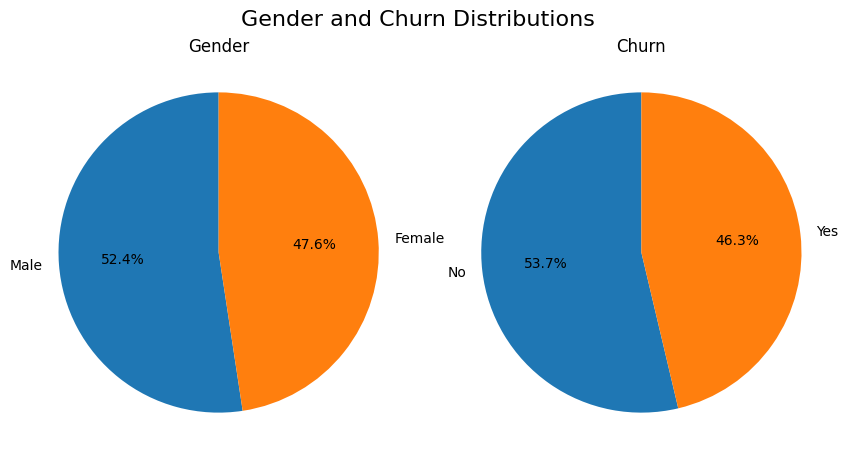

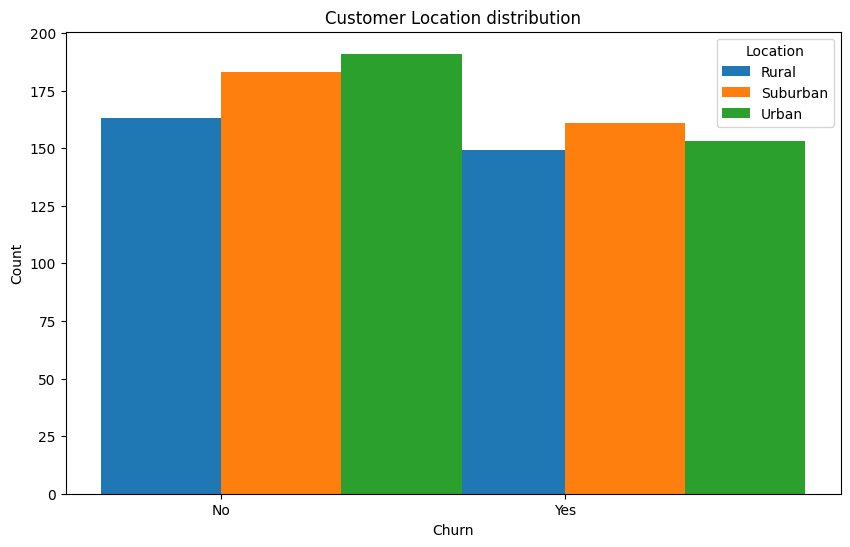

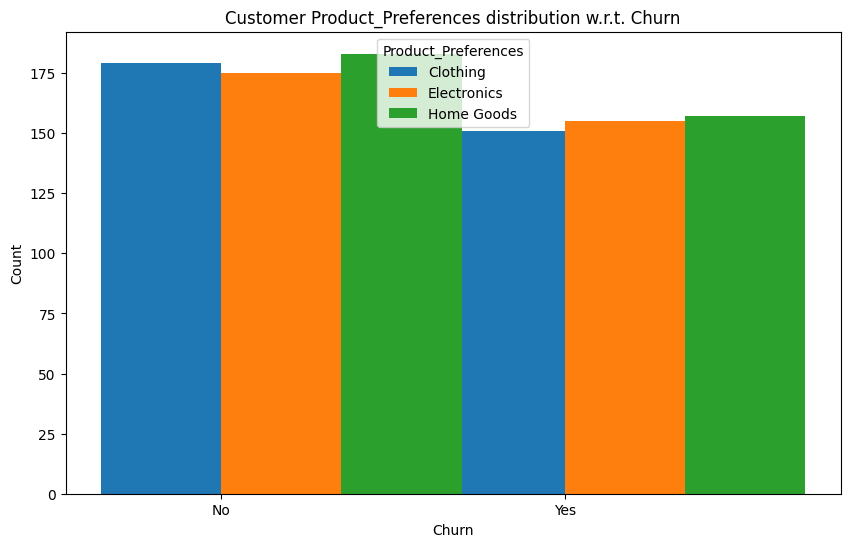

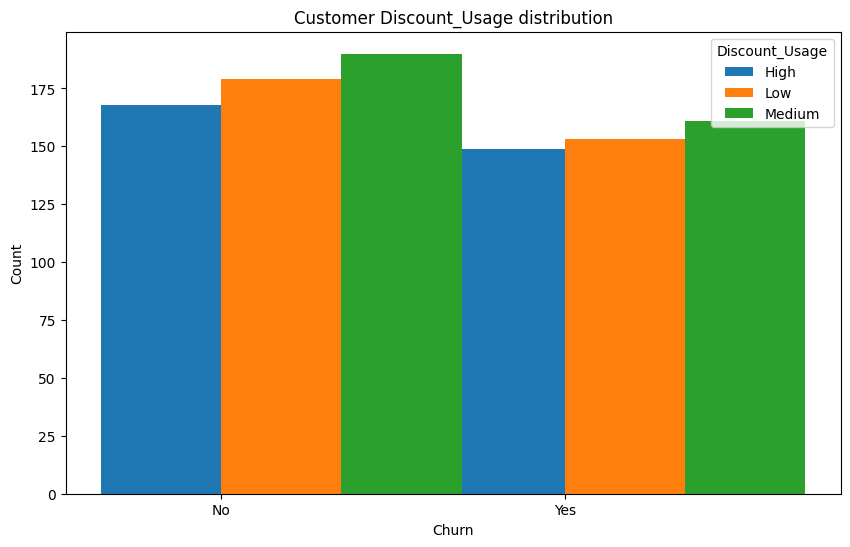

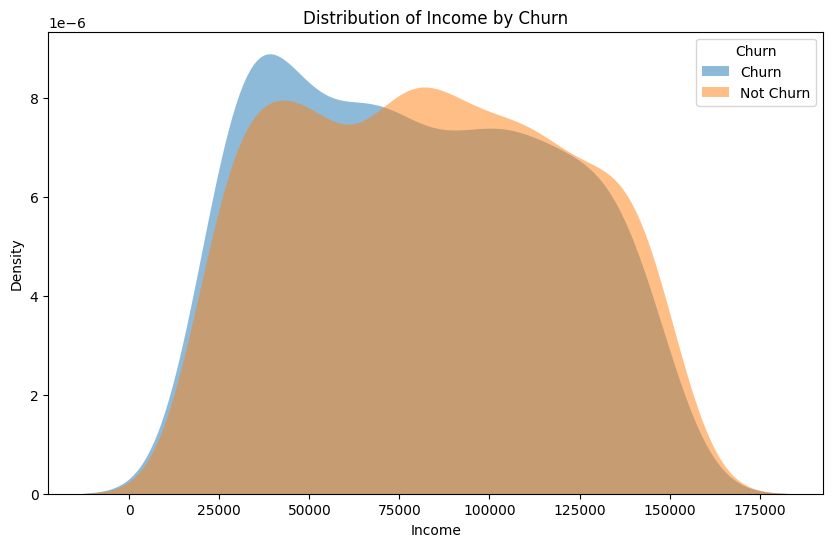

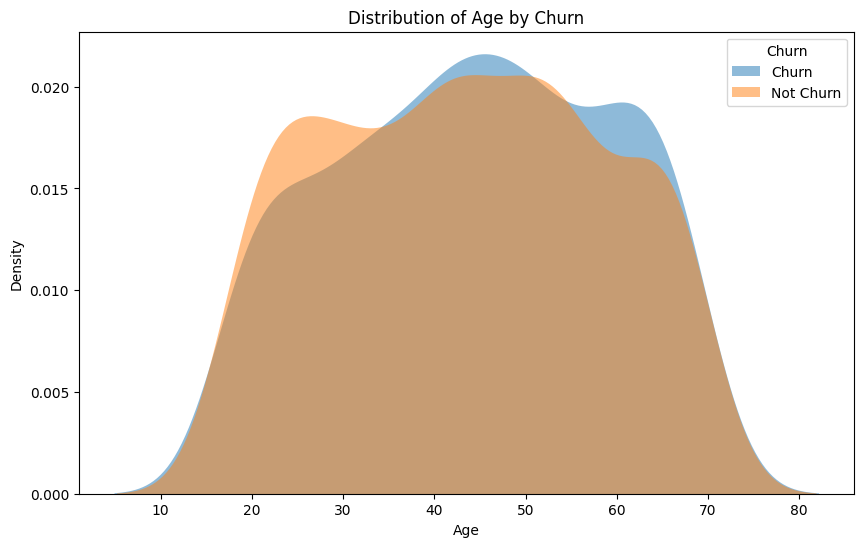

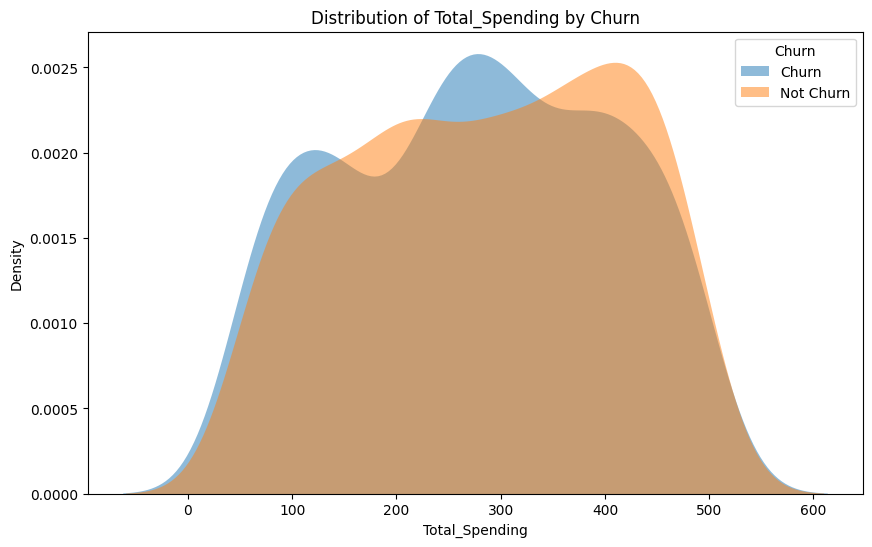

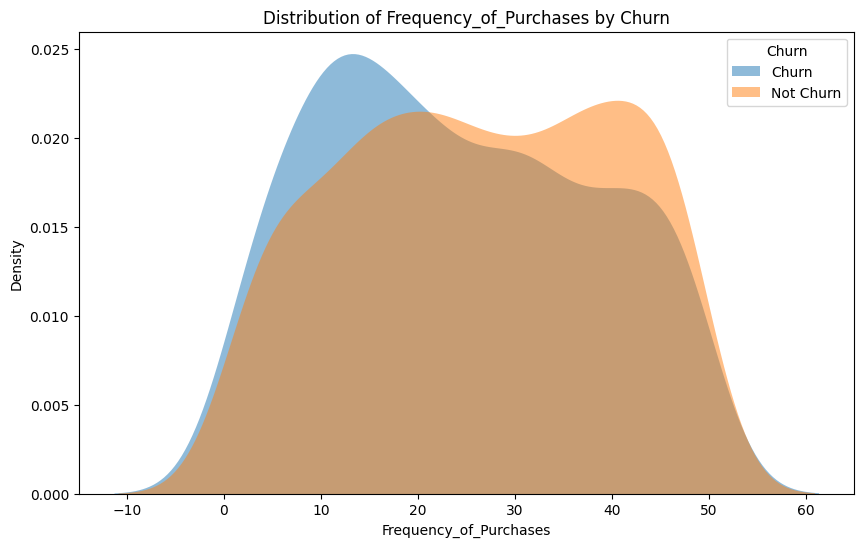

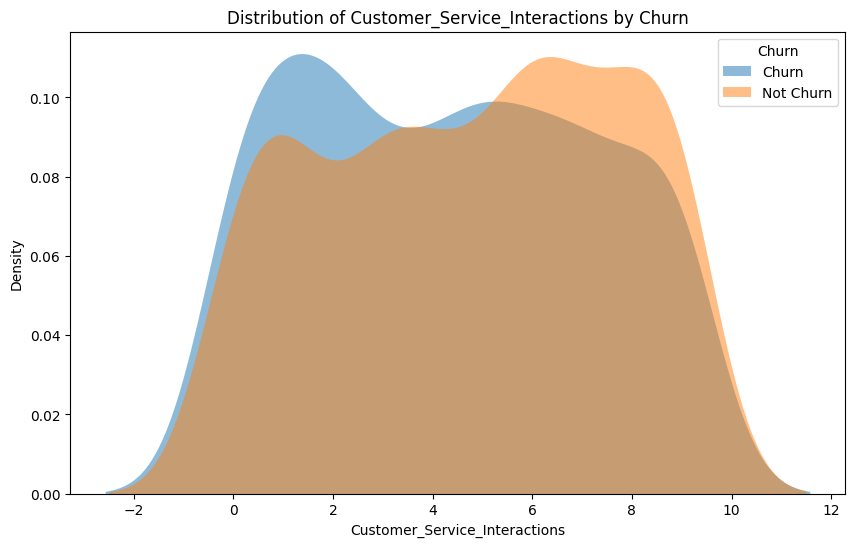

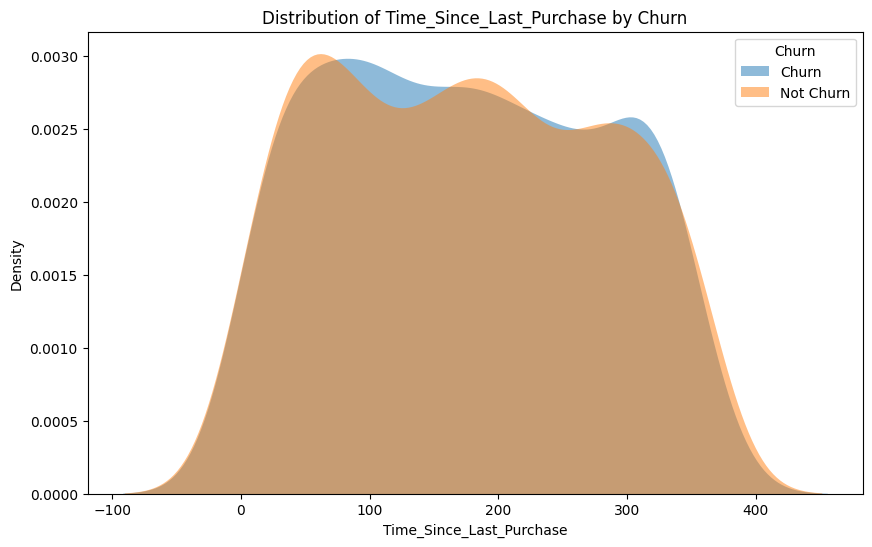

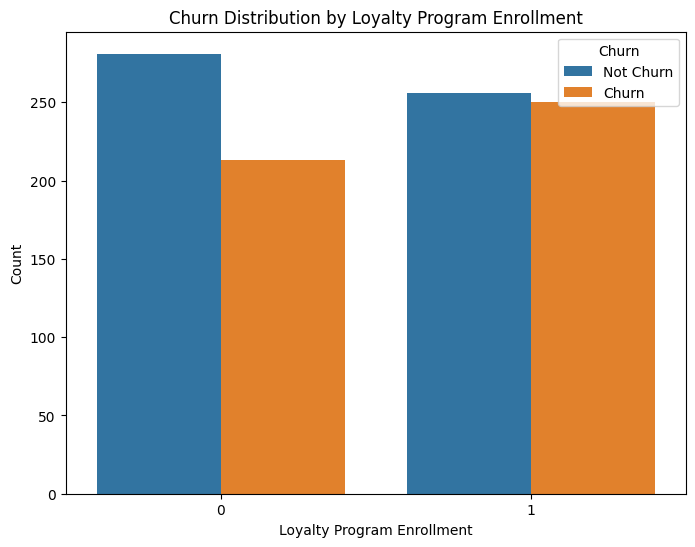

In [ ]:
df = pd.read_csv("customer_churn_dataset.csv")

# GENDER
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
g_counts = df['Gender'].value_counts()
c_counts = df['Churn'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(g_counts, labels=g_labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender')

axs[1].pie(c_counts, labels=c_labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Churn')

axs[0].axis('equal')
axs[1].axis('equal')

fig.suptitle('Gender and Churn Distributions', fontsize=16)

plt.show()



# LOCATION

churn_values = df['Churn']
Location_values = df['Location']

churn_Location_counts = df.groupby(['Churn', 'Location']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = churn_Location_counts.index

for i, Location_type in enumerate(churn_Location_counts.columns):
    ax.bar(x - width/2 + i*width, churn_Location_counts[Location_type], width, label=Location_type)

ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Customer Location distribution')
ax.set_xticks(x)
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Location')

plt.show()

# PRODUCT PREFERENCE

churn_values = df['Churn']
Product_Preferences_values = df['Product_Preferences']

churn_Product_Preferences_counts = df.groupby(['Churn', 'Product_Preferences']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = churn_Product_Preferences_counts.index

for i, Product_Preferences in enumerate(churn_Product_Preferences_counts.columns):
    ax.bar(x - width/2 + i*width, churn_Product_Preferences_counts[Product_Preferences], width, label=Product_Preferences)

ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Customer Product_Preferences distribution w.r.t. Churn')
ax.set_xticks(x)
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Product_Preferences')

plt.show()


# DISCOUNT USAGE

churn_values = df['Churn']
Discount_Usage_values = df['Discount_Usage']

churn_Discount_Usage_counts = df.groupby(['Churn', 'Discount_Usage']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = churn_Discount_Usage_counts.index

for i, Discount_Usage_type in enumerate(churn_Discount_Usage_counts.columns):
    ax.bar(x - width/2 + i*width, churn_Discount_Usage_counts[Discount_Usage_type], width, label=Discount_Usage_type)

ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Customer Discount_Usage distribution')
ax.set_xticks(x)
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Discount_Usage')

plt.show()

# INCOME

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Income", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Income", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Income by Churn')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# AGE

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Age", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Age", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Age by Churn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# Total spending

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Total_Spending", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Total_Spending", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Total_Spending by Churn')
plt.xlabel('Total_Spending')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# Freq of purchase

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Frequency_of_Purchases", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Frequency_of_Purchases", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Frequency_of_Purchases by Churn')
plt.xlabel('Frequency_of_Purchases')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# Customer Service interaction

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Customer_Service_Interactions", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Customer_Service_Interactions", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Customer_Service_Interactions by Churn')
plt.xlabel('Customer_Service_Interactions')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# Time since last purchase

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x="Time_Since_Last_Purchase", fill=True, alpha=0.5, linewidth=0, label='Churn')
sns.kdeplot(data=df[df['Churn'] == 0], x="Time_Since_Last_Purchase", fill=True, alpha=0.5, linewidth=0, label='Not Churn')
plt.title('Distribution of Time_Since_Last_Purchase by Churn')
plt.xlabel('Time_Since_Last_Purchase')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

# Loyalty Program

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loyalty_Program', hue='Churn')
plt.title('Churn Distribution by Loyalty Program Enrollment')
plt.xlabel('Loyalty Program Enrollment')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()





# PRE PROCESSING, TRAINING, EVALUATION

In [ ]:
df = pd.read_csv("customer_churn_dataset.csv")

In [ ]:
# This is to check if there are any NULL or empty values
msno.matrix(df);
df.isnull().sum()

In [ ]:
df = pd.read_csv("customer_churn_dataset.csv")
X = df.drop(columns=['Customer_ID', 'Churn'])
y = df['Churn']

# Maknig diff DF with numerical and categorical value

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

Plot before scaling the numerical data shows difference in scales

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    plt.hist(frame[feature], color=color, bins=30, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

num_cols = ['Income', 'Frequency_of_Purchases', 'Time_Since_Last_Purchase', 'Total_Spending', 'Age']
for feat in num_cols:
    distplot(feat, df)

After Scaling and handling categorical value



In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Splitting the data in test and train

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 27, stratify=y)

df.corr()['Churn'].sort_values(ascending = False)

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)

# plotting the SAME graph after scaling

def distplot(feature, frame, color='c'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    plt.hist(frame[feature], color=color, bins=30, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

for feat in num_cols:
    distplot(feat, df_std)

Learning without Grid search (hyperparameter)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train_processed,y_train)
predicted_y = knn_model.predict(X_test_processed)

# ADABOOST
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=27)
adaboost_model.fit(X_train_processed, y_train)
predicted_y = adaboost_model.predict(X_test_processed)
accuracy_adaboost = adaboost_model.score(X_test_processed, y_test)

# RANDOM FOREST
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train_processed, y_train)
prediction_test = model_rf.predict(X_test_processed)

# LOGISTIC REGRESSION
lr_model = LogisticRegression()
lr_model.fit(X_train_processed,y_train)
accuracy_lr = lr_model.score(X_test_processed,y_test)

# DECISION TREE CLASSIFIER
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_processed,y_train)
predictdt_y = dt_model.predict(X_test_processed)
accuracy_dt = dt_model.score(X_test_processed,y_test)

# GRAD BOOSTING
gb = GradientBoostingClassifier()
gb.fit(X_train_processed, y_train)
gb_pred = gb.predict(X_test_processed)


# printing the score
def print_metrics(models, X_test, y_test):
    for name, model in models.items():
        predicted_y = model.predict(X_test)
        accuracy = accuracy_score(y_test, predicted_y)
        precision = precision_score(y_test, predicted_y)
        recall = recall_score(y_test, predicted_y)
        f1 = f1_score(y_test, predicted_y)
        print(f"{name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print()

models = {
    'KNN': knn_model,
    'AdaBoost': adaboost_model,
    'Random Forest': model_rf,
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Gradient Boosting': gb
}
print_metrics(models, X_test_processed, y_test)

Adding grid search to Random Forest
(Takes around 4 min to run the cell below)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

model_rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=50, max_features="auto", max_leaf_nodes=30)

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new model with the best parameters
best_model_rf = RandomForestClassifier(**best_params)
best_model_rf.fit(X_train_processed, y_train)
prediction_test = best_model_rf.predict(X_test_processed)
f1_rf = f1_score(y_test, prediction_test)

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)
print("F1 Score (Random Forest):", f1_rf)

Tried to club different classifiers for better result

In [ ]:
model1 = DecisionTreeClassifier()
model2 = AdaBoostClassifier(n_estimators=50, random_state=27)
model3 = GradientBoostingClassifier()

# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', model1), ('rf', model2), ('ada', model3)], voting='hard')

ensemble_model.fit(X_train_processed, y_train)
predictions = ensemble_model.predict(X_test_processed)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy:", accuracy)
print("f1", f1)